In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ref.: https://stackoverflow.com/questions/39001856/convert-tecplot-ascii-to-python-numpy
def tecplot_reader(file, nb_var):
    """Tecplot reader."""
    arrays = []
    with open(file, 'r') as a:
        for idx, line in enumerate(a.readlines()):
            if idx < 2:
                # Skip the TITLE, VARIABLES and ZONE lines
                continue
            else:
                arrays.append([float(s) for s in line.split()])

    arrays = np.concatenate(arrays)
    output = np.split(arrays, nb_var)

    return output

# UGKS 1D

In [3]:
X, RHO, T = tecplot_reader('../shock.dat', 3)

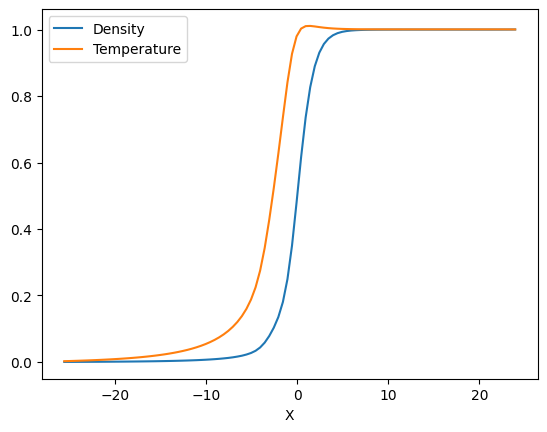

In [4]:
# Plot the results
fig, ax = plt.subplots()
ax.plot(X, RHO, label='Density')
ax.plot(X, T, label='Temperature')
ax.set_xlabel('X')
ax.legend()
plt.show()

# UGKS 2D

In [5]:
X, Y, RHO, U, V, T, P, QX, QY = tecplot_reader('../cavity.dat', 9)

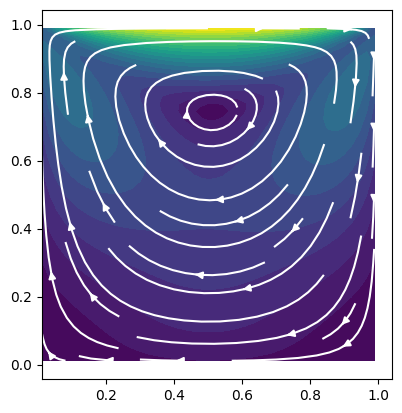

In [6]:
# Plot velocity field streamlines
fig, ax = plt.subplots()
ax.streamplot(X.reshape(45, 45), Y.reshape(45, 45), U.reshape(45, 45), V.reshape(45, 45), color='w', density=0.5)
UMAG = np.sqrt(U**2 + V**2)
ax.contourf(X.reshape(45, 45), Y.reshape(45, 45), UMAG.reshape(45, 45), 20)
ax.set_aspect('equal')
plt.show()

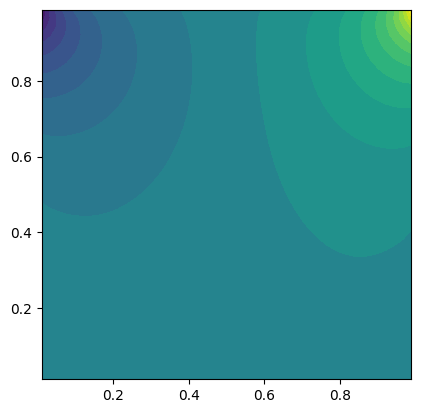

In [7]:
# Plot the pressure field
fig, ax = plt.subplots()
ax.contourf(X.reshape(45, 45), Y.reshape(45, 45), P.reshape(45, 45), 20)
ax.set_aspect('equal')
plt.show()

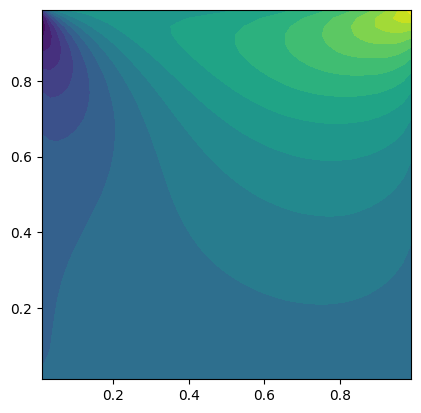

In [8]:
# Plot the temperature field
fig, ax = plt.subplots()
ax.contourf(X.reshape(45, 45), Y.reshape(45, 45), T.reshape(45, 45), 20)
ax.set_aspect('equal')
plt.show()

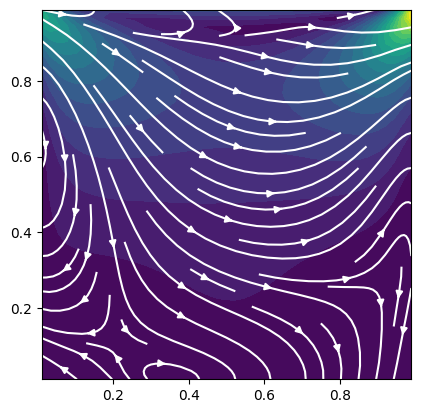

In [9]:
# Plot the heat flux field
fig, ax = plt.subplots()
ax.streamplot(X.reshape(45, 45), Y.reshape(45, 45), QX.reshape(45, 45), QY.reshape(45, 45), color='w', density=0.75)
QMAG = np.sqrt(QX**2 + QY**2)
ax.contourf(X.reshape(45, 45), Y.reshape(45, 45), QMAG.reshape(45, 45), 20)
ax.set_aspect('equal')
plt.show()